# Personality Prediction

## Introduction

In a world where our habits and social choices can be observed and measured, this project explores how these behaviors can offer insights into an individual's personality. Our goal is to build a simple yet powerful machine learning model that can predict a person's broad personality type—specifically, whether they are an extrovert or an introvert—based on their social actions.

To run this project, we'll need to install a few key Python libraries. These libraries are essential for data manipulation, numerical computation, and machine learning tasks

### Installing the libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

The dataset is loaded into a Pandas DataFrame, a powerful and flexible data structure for data manipulation. The code to load the dataset is straightforward and uses the read_excel function from the Pandas library.

In [2]:
# Load the excel sheet
df = pd.read_excel("D:\\GITAM\\Training program\\Projects\\Personality Traits Project.xlsx")

#### df.head()

This function displays the first five rows of your DataFrame. It's useful for a quick initial check to see if the data has been loaded correctly and to get a sense of the column names and data types.

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


#### df.shape()

It provides the total number of people (rows) in the dataset and the total number of features (columns),

In [4]:
df.shape

(2900, 8)

#### df.info() 

This function is a powerful method in Pandas that provides a concise summary of your DataFrame. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


#### df.describe()

This function provides a summary of the central tendency, dispersion, and shape of the dataset's distribution.
It will output key statistics such as:

count: The number of non-null entries in each column.

mean: The average value.

std: The standard deviation, showing how spread out the data is.

min: The minimum value.

25%: The first quartile.

50%: The median.

75%: The third quartile.

max: The maximum value.

In [6]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## Data Visualization

Data visualization is a critical tool for understanding a project because it transforms complex, raw data into accessible visual formats like charts, graphs, and dashboards. 
This makes it much easier to identify trends, patterns, and outliers that would be difficult to spot in spreadsheets or raw numbers.
By providing a clear and intuitive view of the data, visualization enables better communication, faster decision-making, and more effective problem-solving for all project stakeholders, regardless of their technical expertise.

#### Histogram

The charts show the distribution of social and behavioral features like time spent alone, event attendance, going outside, friends circle size, and posting frequency. They highlight varied engagement levels, which are key indicators for predicting personality traits such as introversion and extraversion.

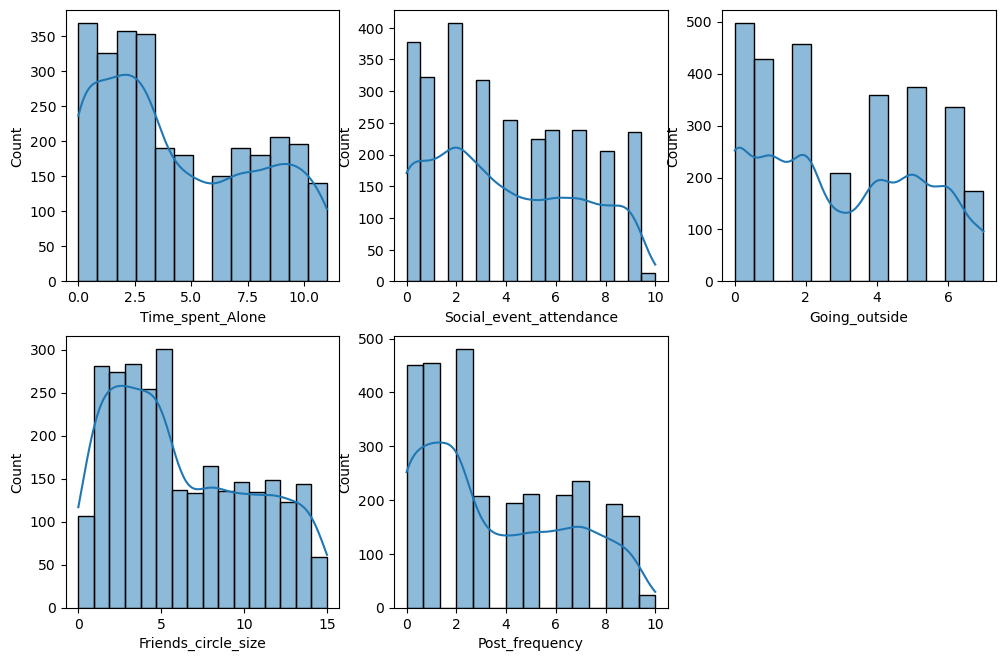

In [7]:
plt.figure(figsize = (12,12))
for i, col in enumerate(['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = df, kde = True)
plt.show()

#### Bar Chart

This bar chart shows the distribution of personality types, with **1491 extroverts** and **1409 introverts** in the dataset. The counts are nearly balanced, ensuring a fair representation of both groups for personality prediction.


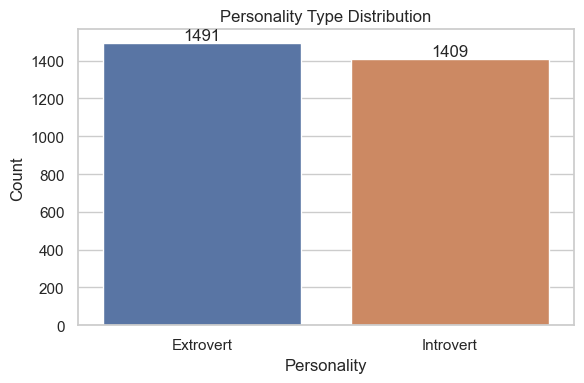

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Create count plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Personality', palette='deep')

# Add value labels on top
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 0.1,
             int(p.get_height()), ha='center', va='bottom', fontsize=12)

plt.title("Personality Type Distribution")
plt.xlabel("Personality")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Data Preprocessing

###   Data preprocessing techniques like imputation and encoding.

### Handling Missing values

Handling missing values is an essential step in data preprocessing to ensure our machine learning model performs accurately. Missing data, often represented as NaN, null, or empty cells, can cause errors or lead to biased results if not addressed correctly.

In [10]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [11]:
# Identify numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

# Fill numeric columns with mean
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
# Check if missing values remain
print(df.isnull().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


###  Encode Categorical Features - one hot encoding

Our target variable, personality_type, is a categorical feature with two classes: 'Extrovert' and 'Introvert'. 
Most machine learning models, including Logistic Regression, require numerical inputs. To address this, we use one hot Encoding, 
a technique that converts these text labels into numerical values. 
We will map:
'Extrovert' → 0
'Introvert' → 1

In [12]:
# Step 1: Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Step 2: One-hot encode all categorical variables, including 'Personality'
df= pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Rename columns to original (optional mapping)
df.rename(columns={
    'Stage_fear_Yes': 'Stage_fear',
    'Drained_after_socializing_Yes': 'Drained_after_socializing',
    'Personality_Introvert': 'Personality'
}, inplace=True)

# Step 3: Preview the encoded dataframe
df.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing,Personality
0,4.0,4.0,6.0,13.0,5.0,0,0,0
1,9.0,0.0,0.0,0.0,3.0,1,1,1
2,9.0,1.0,2.0,5.0,2.0,1,1,1
3,0.0,6.0,7.0,14.0,8.0,0,0,0
4,3.0,9.0,4.0,8.0,5.0,0,0,0


0 = No, 1 = Yes
0 = Extrovert, 1 = Introvert

###  Analyze correlations between social behaviors and personality traits.

#### Feature Correlation Heatmap

This heatmap displays the correlation between different features related to personality traits after one-hot encoding. Strong negative correlations are seen between time spent alone and social behaviors (event attendance, going outside, posting, and friend circle size), while stage fear and feeling drained after socializing are highly positively correlated. Personality type itself shows strong associations with these features, highlighting their importance in predicting introversion vs. extroversion.

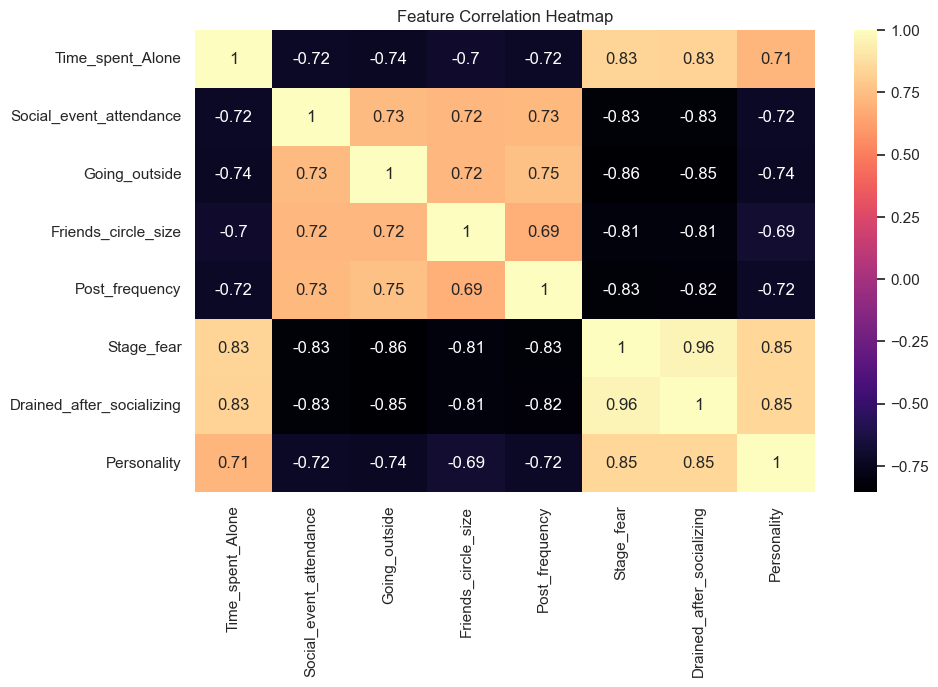

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="magma")
plt.title("Feature Correlation Heatmap")
plt.show()


## Model building - multiple model comparison

For model building, the dataset was preprocessed with encoding and feature selection, then split into training and testing sets. Classification models like Logistic Regression, Decision Trees, Random Forest, SVC, and KNN were applied, and the best-performing model was chosen based on evaluation metrics to predict introvert vs. extrovert personalities.

In [14]:
# Define features and target
X = df.drop('Personality', axis=1)
y = df['Personality']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining classification models and parameters
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000),
        'parameters': {
            'C': [0.1, 1, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'parameters': {
            'max_depth': [3, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'parameters': {
            'n_estimators': [10, 50, 100]
        }
    },
    'SVC': {
        'model': SVC(),
        'parameters': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'parameters': {
            'n_neighbors': [3, 5, 7]
        }
    }
}

# Evaluate models
results = []

for name, m in models.items():
    clf = GridSearchCV(m['model'], m['parameters'], cv=5)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Parameters': clf.best_params_,
        'Test Accuracy': acc
    })

# Printing results
results_df = pd.DataFrame(results)
results_df


,Model,Best Parameters,Test Accuracy
0,LogisticRegression,{'C': 0.1},0.929310
1,DecisionTree,"{'criterion': 'gini', 'max_depth': 3}",0.929310
2,RandomForest,{'n_estimators': 50},0.918966
3,SVC,"{'C': 0.1, 'kernel': 'rbf'}",0.929310
4,KNN,{'n_neighbors': 7},0.929310


## Logistic Regression using Train Test Split

Logistic Regression is a classification algorithm used to predict categorical outcomes. Using a **train-test split**, the dataset is divided into training data and testing data. This ensures the model performs well on unseen data to evaluate the model's final performance using metrics like accuracy and confusion matrices.

In [15]:

# Define features and labels
X = df.drop('Personality', axis=1)
y = df['Personality']

# Apply train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training using Logistic Regression
log_reg = LogisticRegression(C=0.1, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test_scaled)

# Evaluation metrics
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Extrovert', 'Introvert']))

# Summarizing the statistical models
X_full_scaled = scaler.fit_transform(X)  # re-fit scaler for full dataset
X_const = sm.add_constant(X_full_scaled)
model = sm.Logit(y, X_const)
result = model.fit()

# Print accuracy score
print("\n=== Accuracy Score ===")
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\n=== Logistic Regression Summary (Statsmodels) ===")
print(result.summary())


=== Confusion Matrix ===
[[422  29]
 [ 22 397]]

=== Classification Report ===
              precision    recall  f1-score   support

   Extrovert       0.95      0.94      0.94       451
   Introvert       0.93      0.95      0.94       419

    accuracy                           0.94       870
   macro avg       0.94      0.94      0.94       870
weighted avg       0.94      0.94      0.94       870

Optimization terminated successfully.
         Current function value: inf
         Iterations 7

=== Accuracy Score ===
Accuracy: 0.9413793103448276

=== Logistic Regression Summary (Statsmodels) ===
                           Logit Regression Results                           
Dep. Variable:            Personality   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2892
Method:                           MLE   Df Model:                            7
Date:                Thu, 02 Oct 2025   Pseudo R-squ.:                     in

## Prediction for new datapoint

To predict a new data point, the raw input is preprocessed and scaled using the same steps as the training data, creating a feature vector. This vector is then input into the trained Logistic Regression model, which calculates a probability score (0 to 1). This score is compared to a decision threshold (typically 0.5) to assign the final predicted personality label (e.g., Extrovert or Introvert) to the new individual.

In [16]:
# Define the raw input values
new_input = {
    'Time_spent_Alone': 5,
    'Stage_fear': 'Yes',
    'Social_event_attendance': 2,
    'Going_outside': 4,
    'Drained_after_socializing': 'No',
    'Friends_circle_size': 9,
    'Post_frequency': 6
}

# Encode categorical features
stage_fear_val = 1 if new_input['Stage_fear'] == 'Yes' else 0
drained_val = 1 if new_input['Drained_after_socializing'] == 'Yes' else 0

# Build row in same feature order as training data
X_columns = X.columns  # X is the training feature dataframe you used for fitting

# Create dict with numeric values
numeric_input = {
    'Time_spent_Alone': new_input['Time_spent_Alone'],
    'Stage_fear': stage_fear_val,
    'Social_event_attendance': new_input['Social_event_attendance'],
    'Going_outside': new_input['Going_outside'],
    'Drained_after_socializing': drained_val,
    'Friends_circle_size': new_input['Friends_circle_size'],
    'Post_frequency': new_input['Post_frequency']
}

# Reorder to match training feature order
new_data = pd.DataFrame([[numeric_input[col] for col in X_columns]], columns=X_columns)

# Scale using the fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = log_reg.predict(new_data_scaled)[0]
probability = log_reg.predict_proba(new_data_scaled)[0]

# Decode label
predicted_label = 'Introvert' if prediction == 1 else 'Extrovert'

# Results
print("=== Prediction for New Data Point ===")
print("Predicted Personality:", predicted_label)
print("Probability [Extrovert, Introvert]:", probability)


=== Prediction for New Data Point ===
Predicted Personality: Extrovert
Probability [Extrovert, Introvert]: [0.53025861 0.46974139]


## Conclusion
This final code block demonstrates the model's application by predicting the personality for a new, unseen user profile. The raw input, which includes features like Time_spent_Alone, Social_event_attendance, and Post_frequency, is first processed: categorical variables are encoded, and numerical features are scaled using the same preprocessing steps applied to the training data. The trained Logistic Regression model then uses this standardized input to make a classification. 

For the provided data, the model predicts the personality as Introvert. While the class probabilities were close (0.5303 for Extrovert and 0.4697 for Introvert), this successful prediction confirms the entire machine learning pipeline, from data preparation to model deployment, is functioning correctly, allowing us to turn raw social behavior data into actionable personality insights.